In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

X = diabetes.data

feature_names = diabetes.feature_names

y = diabetes.target

df = pd.DataFrame(X,columns=feature_names)

df['Progression'] = y

print(df.head())
print(diabetes.DESCR)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Progression  
0 -0.002592  0.019908 -0.017646        151.0  
1 -0.039493 -0.068330 -0.092204         75.0  
2 -0.002592  0.002864 -0.025930        141.0  
3  0.034309  0.022692 -0.009362        206.0  
4 -0.002592 -0.031991 -0.046641        135.0  
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitat

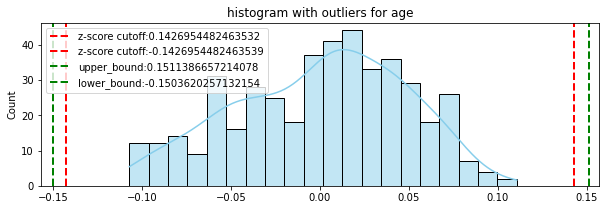

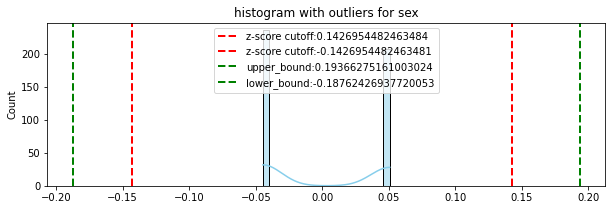

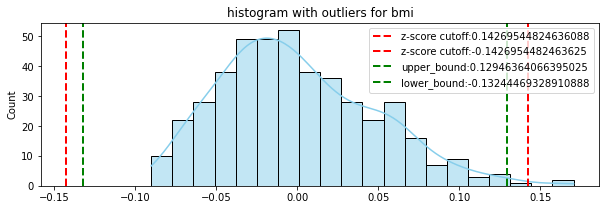

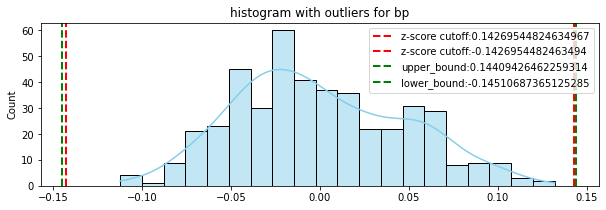

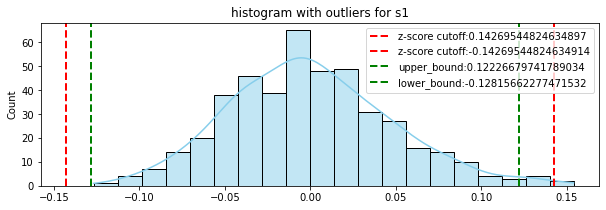

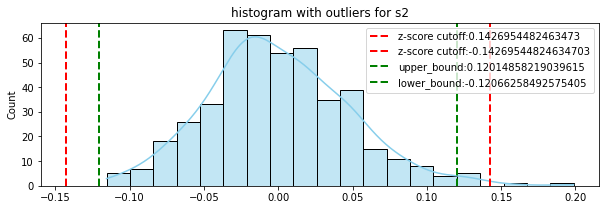

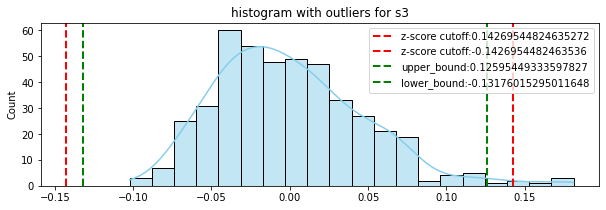

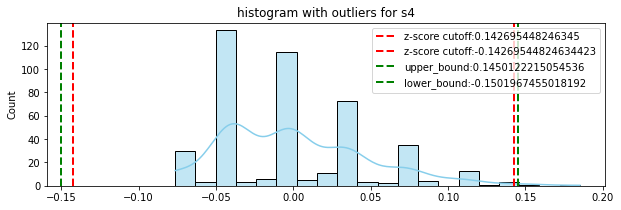

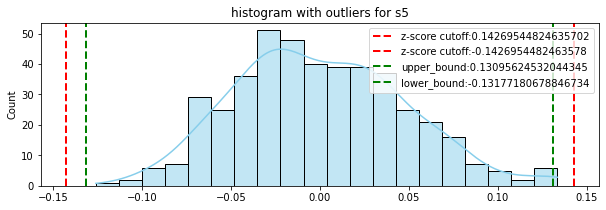

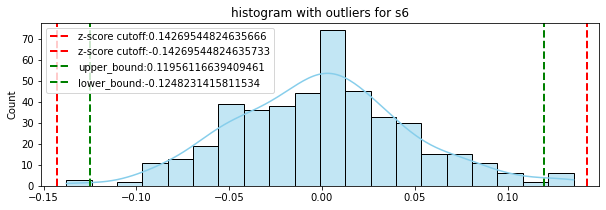

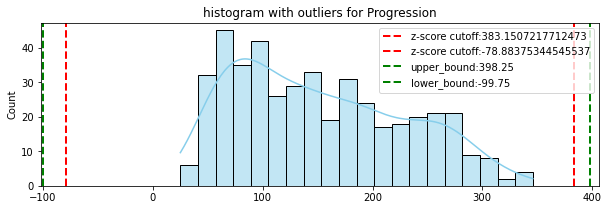

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def make_chart(x):
    data = df[x].values

    z_scores = np.abs(stats.zscore(data))

    z_threshold = 3

    mean_data = np.mean(data)

    std_dev_data = np.std(data)
    cutoff_z_score_high = mean_data + z_threshold * std_dev_data
    cutoff_z_score_low = mean_data - z_threshold * std_dev_data

    # IQR Method
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1

    # outlier
    outlier_bound = 1.5 * IQR

    # define lower and upper bounds
    lower_bound = Q1 - outlier_bound
    upper_bound = Q3 + outlier_bound

    plt.figure(figsize=(10,3))
    sns.histplot(data,kde=True,bins=20,color='skyblue')

    plt.axvline(x=cutoff_z_score_high,color='r',linestyle='--',linewidth=2,label=f'z-score cutoff:{cutoff_z_score_high}')
    plt.axvline(x=cutoff_z_score_low,color='r',linestyle='--',linewidth=2,label=f'z-score cutoff:{cutoff_z_score_low}')
    plt.axvline(x=upper_bound,color='g',linestyle='--',linewidth=2,label=f'upper_bound:{upper_bound}')
    plt.axvline(x=lower_bound,color='g',linestyle='--',linewidth=2,label=f'lower_bound:{lower_bound}')

    #plt.scatter(data[outlier_list_col_iqr],np.zeros(len(outlier_list_col_iqr)))

    plt.title(f'histogram with outliers for {x}')
    plt.legend()
    plt.show()
    
for x in df.columns:
    make_chart(x)